In [4]:
dut.disconnect()

Serial port disconnected.


In [ ]:
dut.ground_PIC()

In [2]:
dut.power_off()

DAC initialized to a span from -5 V to 5 V


In [2]:
%reload_ext autoreload
%autoreload

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)

In [3]:
dut.power_on()

DAC initialized to a span from -5 V to 5 V


Calibrate all 12 ADCs on A0

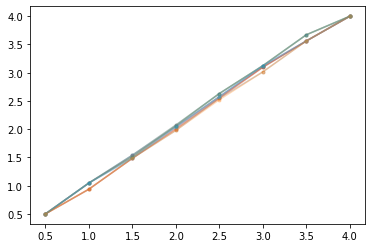

In [5]:
for addr_fifo in range(12):
    volt_in = np.arange(0.5, 4.5, 0.5)
    data = dut.calibrate_adc(volt_in, addr_fifo=addr_fifo )
    volt_out = [dut.adc2volt(d) for d in data]

    plt.plot(volt_in, volt_out, '.-', alpha=0.3)

In [21]:
drv.gpio_pin_reset(*PIC_PINS['READ_DPE'])
drv.gpio_pin_reset(*PIC_PINS['READ_BIT'])
dut.pads_defaults()

dut.scan_tia( BitArray('0b1100000100'*96).bytes )

dut.load_vectors_rows_to_zero()
dut.load_vectors_cols_to_zero()

drv.gpio_array_en_write(0b010)
drv.gpio_pin_set(*PIC_PINS['COL_ROW_SEL'])
drv.gpio_row_col_bank_write(0b0001)
drv.gpio_row_col_data_write(0b1000_0000_0000_0000)
time.sleep(1e-5)
drv.gpio_pin_set(*PIC_PINS['LATCH_CLK_DATA'])
time.sleep(1e-5)
drv.gpio_pin_reset(*PIC_PINS['LATCH_CLK_DATA'])

dut.reset_dpe()

In [22]:
drv.gpio_pin_set(*PIC_PINS['WRITE_SEL_EXT'])
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_OVERRIDE_EN'])                 
time.sleep(5e-6)   
drv.gpio_nforce_safe_write(0b010)
time.sleep(5e-6)        # delay(t_cal_start), min = 2TCK
drv.gpio_pin_set(*PIC_PINS['COL_WRITE_CONNECT'])
time.sleep(5e-6)        # delay(t_opamp), min = 500ns
drv.gpio_pin_set(*PIC_PINS['CONNECT_TIA'])
#drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

In [23]:
# Before setting this, we're using an external current source to apply to the board!
drv.gpio_pin_set(*PIC_PINS['DPE_EXT_SH'])

In [24]:
n_adc = 2

data = dut.download_fifo( n_adc )

for d in data:
    print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    
# drv.gpio_adc_fifo_en_write(n_adc)

# for strobe in range(15):
#     drv.gpio_pin_set(*PIC_PINS['ADC_FIFO_ADVANCE'])
#     drv.gpio_pin_reset(*PIC_PINS['ADC_FIFO_ADVANCE'])
#     data = drv.gpio_adc_read()
#     print(f'{data:013b}', end='\t')
#     #print(strobe)
#     print( f'{dut.adc2volt(data):.3f} V' )
# print()

0110001000000 -> 0.719
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0110000000000 -> 0.500
0111101111110 -> 3.559
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000001000 -> 0.527
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500


In [16]:
for n_adc in range(12):
    data = dut.download_fifo( n_adc )

    for d in data:
        print(f'{d:013b} -> {dut.adc2volt(d):.3f}')
    print()

0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500

0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500

0100001000000 -> 0.719
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000001 -> 0.503
0100000000000 -> 0.500
0100000000000 -> 0.500
0101101111111 -> 3.562
0100000000000 -> 0.500
0100000000000 -> 0.500
0100000000000 -> 0.500
010000000